<a href="https://colab.research.google.com/github/Dennis-fast-ai/MNIST/blob/main/mnist_all_numbers_001.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#hide
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

     |████████████████████████████████| 727kB 15.6MB/s 
     |████████████████████████████████| 51kB 7.4MB/s 
     |████████████████████████████████| 1.1MB 54.8MB/s 
     |████████████████████████████████| 194kB 52.0MB/s 
     |████████████████████████████████| 61kB 10.6MB/s 
Mounted at /content/gdrive


In [ ]:
#hide
from fastai.vision.all import *
from fastbook import *
from fastai.vision.widgets import *

matplotlib.rc('image', cmap='Greys')

In [ ]:
path = untar_data(URLs.MNIST)

In [ ]:
dls = ImageDataLoaders.from_folder(path, valid_pct=0.2)
dls.valid_ds.items[:6]

[Path('training/1/40359.png'),
 Path('training/7/47170.png'),
 Path('training/2/10766.png'),
 Path('testing/8/3771.png'),
 Path('training/3/16549.png'),
 Path('training/4/37221.png')]

In [ ]:
fnames = get_image_files(path)
def label_func(x): return x.parent.name
dls = ImageDataLoaders.from_path_func(path, fnames, label_func)

In [ ]:
class DataLoaders(GetAttr):
    def __init__(self, *loaders): self.loaders = loaders
    def __getitem__(self, i): return self.loaders[i]
    train,valid = add_props(lambda i,self: self[i])

In [ ]:
training = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

In [ ]:
dls = training.dataloaders(path)

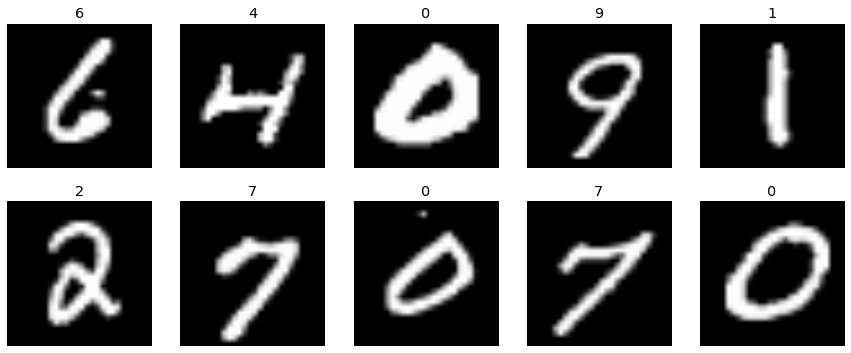

In [ ]:
dls.valid.show_batch(max_n=10, nrows=2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.cache/torch/hub/checkpoints/resnet34-333f7ec4.pth


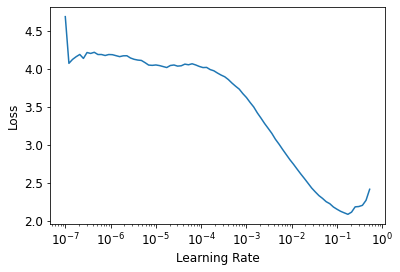

In [ ]:
learn = cnn_learner(dls, resnet34, metrics=error_rate)
lr_min,lr_steep = learn.lr_find()

In [ ]:
learn.fit_one_cycle(4, 1e-2)

epoch,train_loss,valid_loss,error_rate,time
0,0.140110,0.150563,0.031143,02:12
1,0.069654,0.038168,0.009929,02:12
2,0.030390,0.028433,0.007429,02:11
3,0.015430,0.023188,0.005643,02:11


In [ ]:
learn.export()

In [ ]:
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('export.pkl')]

In [ ]:
from google.colab import files
files.download(path/'export.pkl')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>